# Project Group 3 : Image Classification using Convolutional Neural Networks


---

## Choosing the data set

We decided to work with a higher-resolution dataset to better understand how to handle images of varying sizes, bringing us closer to real-world scenarios. At the same time, we aim to focus on the learning process rather than grading outcomes, balancing both perspectives.

While the lower-resolution CIFAR-10 dataset requires less computational power and shorter training times, dataset #2 demands a more complex architecture.

As a team, we voted to prioritize gaining as much experience as possible with real-world challenges and chose dataset #2. We particularly anticipate learning new skills in data processing, coding, and CNN preprocessing, which will significantly enhance our expertise.





Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [3]:
!pip install torchinfo

import pandas as pd
import torch
import torchvision
from torch import nn, optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torchinfo import summary
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Visualization:

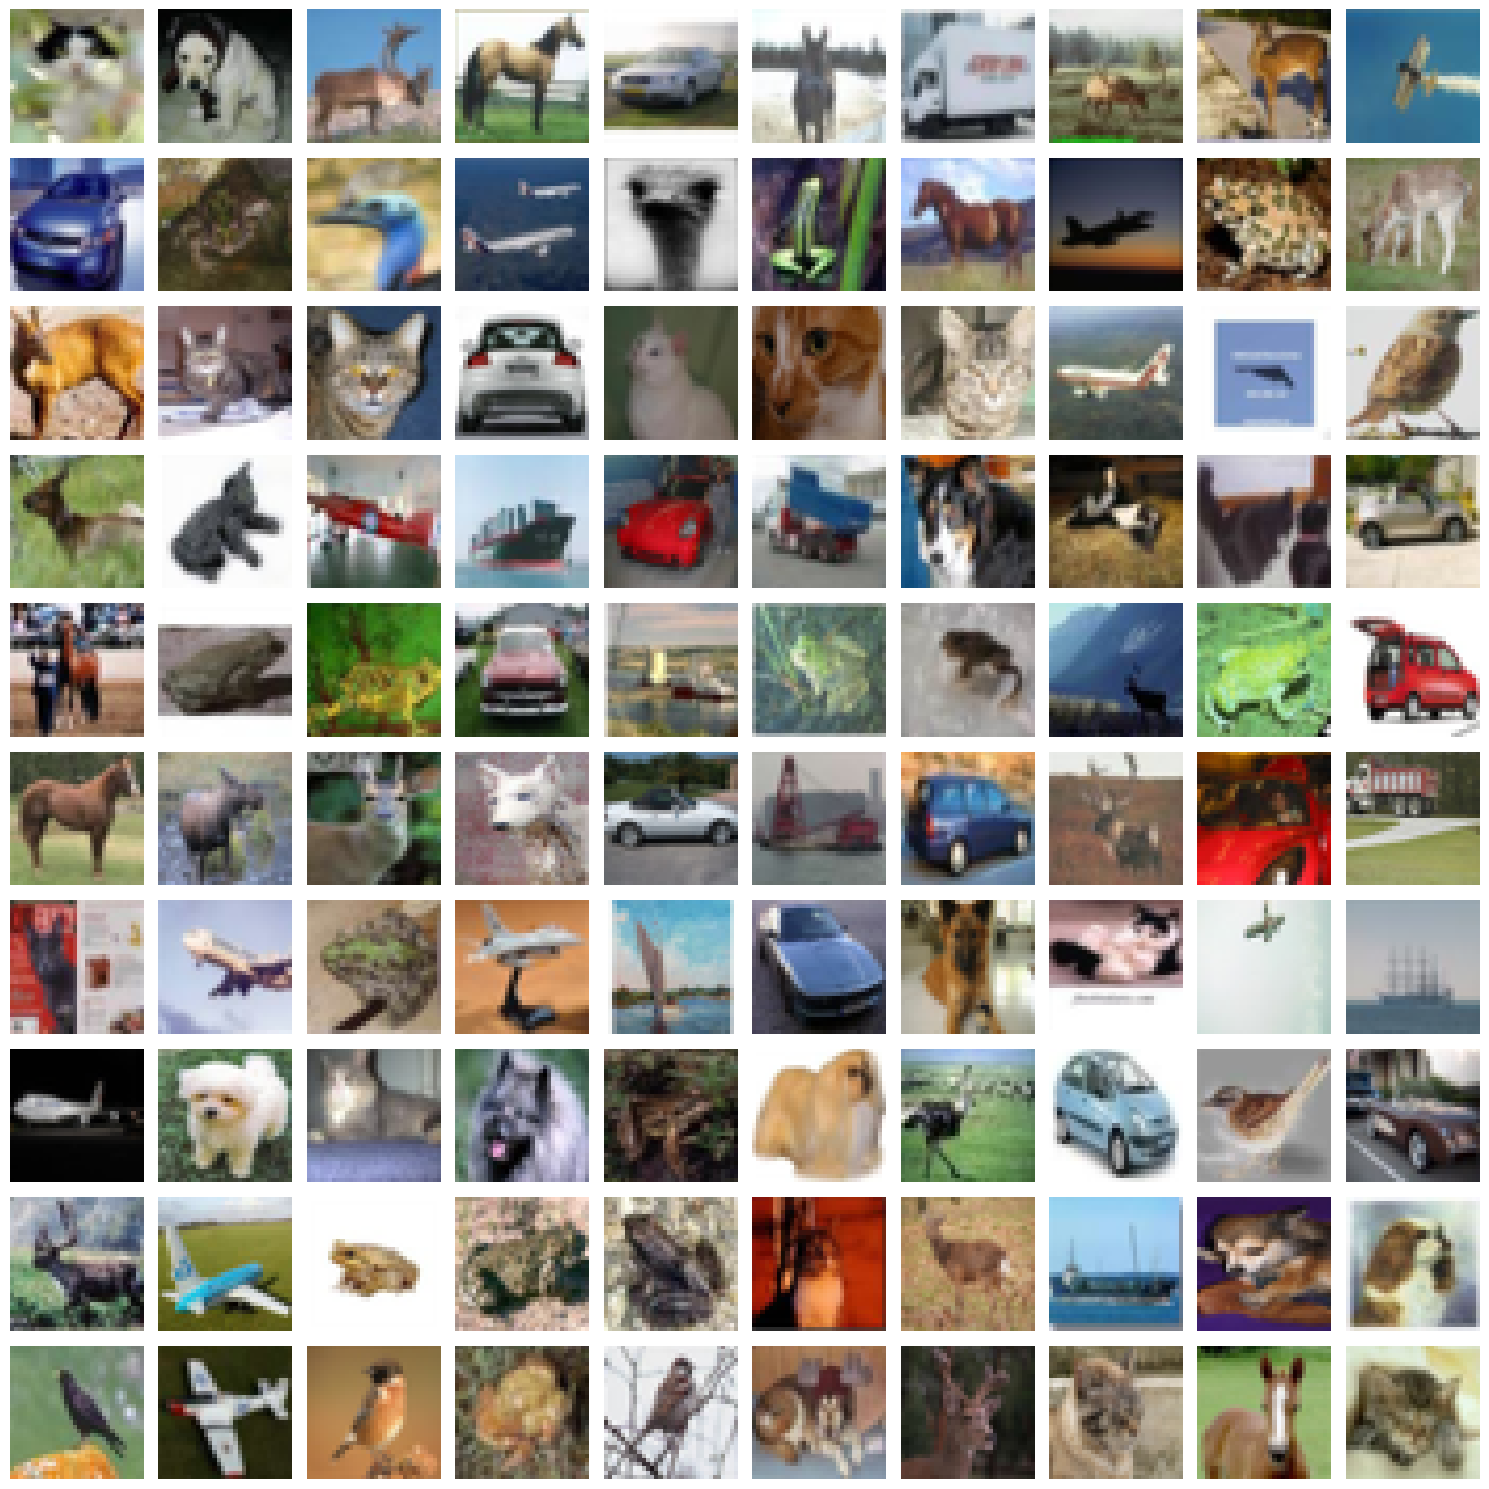

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 10x10 grid
plt.figure(figsize=(15, 15))  # Set the figure size for better visibility

# Randomly select 100 indices
random_indices = np.random.choice(len(x_train), 100, replace=False)

for i, idx in enumerate(random_indices):
    plt.subplot(10, 10, i + 1)  # Create a 10x10 grid
    plt.imshow(x_train[idx], cmap=plt.get_cmap('gray'))  # Display a random image
    plt.axis('off')  # Turn off axes for cleaner visualization

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()


Get Range of values:

In [14]:
print("Minimum value:", np.min(x_train))  # Find the minimum value
print("Maximum value:", np.max(x_train))  # Find the maximum value
print("Range:", np.ptp(x_train))  # Range = max - min

Minimum value: 0.0
Maximum value: 1.0
Range: 1.0


Visualization Content:

In [7]:
type(x_train)
print(x_train)

x_train.shape

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

(50000, 32, 32, 3)

Coverting Labels:

In [15]:
from tensorflow.keras.utils import to_categorical

# Assuming your labels are in a variable `y`
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Example labels

# One-Hot Encode the labels
y_encoded = to_categorical(y, num_classes=10)

print(y_encoded)



[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Normalizing the Data:

In [9]:
print("Minimum value:", np.min(x_train))  # Find the minimum value
print("Maximum value:", np.max(x_train))  # Find the maximum value
print("Range:", np.ptp(x_train))  # Range = max - min

Minimum value: 0
Maximum value: 255
Range: 255


In [10]:
from tensorflow.keras.utils import to_categorical

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Assuming y_train and y_test are your target labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [11]:
from keras.backend import clear_session
clear_session()

# Model / data parameters
num_classes = 10
input_shape_value = (32, 32, 3)

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = keras.Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape = input_shape_value))
model.add(MaxPooling2D(pool_size=(2, 2)))
        
model.add(Flatten())


model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [13]:
batch_size_value = 512
epochs_value = 50

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size_value, epochs=epochs_value)

KeyboardInterrupt: 

*   Plot the cross entropy loss curve and the accuracy curve

In [230]:
print(history.history.keys())

print(history.history['loss']) # returns the loss value at the end of each epoch
print(history.history['accuracy']) # returns the accuracy at the end of each epoch

dict_keys(['accuracy', 'loss'])
[2.199385404586792, 2.045553684234619, 1.9593589305877686, 1.9140790700912476, 1.8744972944259644, 1.843327522277832, 1.8088737726211548, 1.7822712659835815, 1.7548359632492065, 1.7259303331375122, 1.694868564605713, 1.6707510948181152, 1.6535531282424927, 1.630082607269287, 1.6050796508789062, 1.5796486139297485, 1.5637495517730713, 1.5388667583465576, 1.5315476655960083, 1.5066882371902466, 1.4922263622283936, 1.4850447177886963, 1.4651553630828857, 1.4494682550430298, 1.4372706413269043, 1.429980754852295, 1.4140490293502808, 1.4048854112625122, 1.3939721584320068, 1.3857941627502441, 1.380359411239624, 1.3659298419952393, 1.3587111234664917, 1.3531841039657593, 1.3393514156341553, 1.337878942489624, 1.3231933116912842, 1.3132370710372925, 1.3048317432403564, 1.2959944009780884, 1.2925410270690918, 1.2856507301330566, 1.270650029182434, 1.266935110092163, 1.264324426651001, 1.2537139654159546, 1.2459490299224854, 1.2373415231704712, 1.240922451019287,

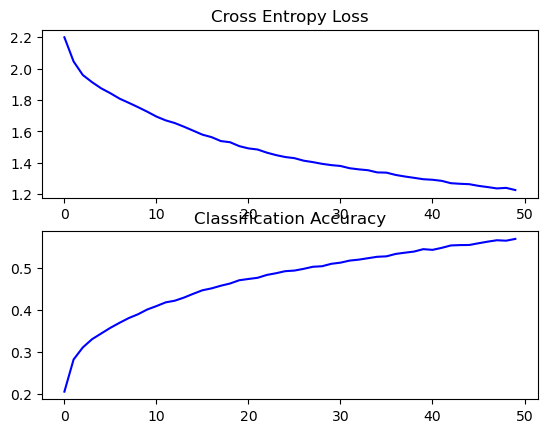

In [231]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.show()

Scoring:

In [232]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.2519816160202026
Test accuracy: 0.5547999739646912


## Defining Deeper Architectures: VGG Models

Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [233]:
from keras.backend import clear_session
clear_session()

* 2nd Approach:

In [234]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model2 = keras.Sequential()

model2.add(Conv2D(32, (3, 3), padding='same', activation="relu", input_shape = input_shape_value))
model2.add(Conv2D(32, (3, 3), padding='same', activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3), activation="relu"))
# model.add(Conv2D(32, (3, 3), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation="softmax"))

model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

3rd Approach:

In [235]:
# from tensorflow import keras
# from tensorflow.keras import layers
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# model = keras.Sequential()

# model.add(Conv2D(32, (3, 3), activation="relu", input_shape = input_shape_value))
# model.add(Conv2D(32, (3, 3), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3), activation="relu"))
# model.add(Conv2D(32, (3, 3), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))       
# model.add(Flatten())

# model.add(Dense(128, activation='relu'))

# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation="softmax"))

# model.summary()

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
batch_size_value = 512
epochs_value = 50

model2.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

history2 = model2.fit(x_train, y_train, batch_size=batch_size_value, epochs=epochs_value)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 32s 321ms/step - accuracy: 0.1477 - loss: 2.2800
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 341ms/step - accuracy: 0.2683 - loss: 2.1110
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 316ms/step - accuracy: 0.2979 - loss: 1.9829
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 281ms/step - accuracy: 0.3230 - loss: 1.9199
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 224ms/step - accuracy: 0.3471 - loss: 1.8573
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - accuracy: 0.3644 - loss: 1.8010
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 218ms/step - accuracy: 0.3796 - loss: 1.7581
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 221ms/step - accuracy: 0.3929 - loss: 1.7271
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 221ms/step - accuracy: 0.4028 - loss: 1.7051
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 222ms/step - accuracy: 0.4180 - loss: 1.6609
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 220ms/step - accuracy: 0.4244 - loss: 1.6371
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 21

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

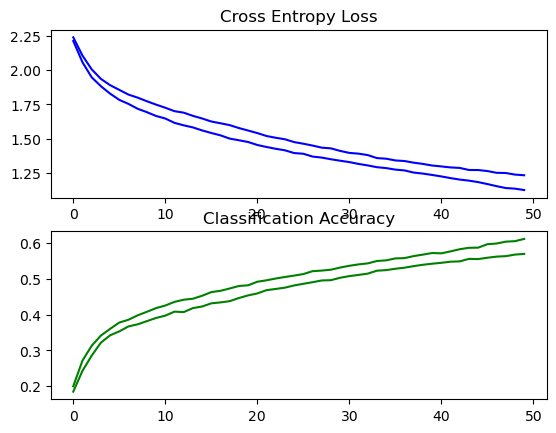

First Arcitecture Approach:
dict_keys(['accuracy', 'loss'])
Test loss: 1.2573968172073364
Test accuracy: 0.5575000047683716 

Deeper Arcitecture:
dict_keys(['accuracy', 'loss'])
Test loss: 1.1908814907073975
Test accuracy: 0.5831999778747559


In [181]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history2.history['loss'], color='green', label='train')
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history2.history['accuracy'], color='green', label='train')
plt.show()

print("\033[1mFirst Arcitecture Approach:\033[0m")
print(history.history.keys())
print("Test loss:", score[0])
print("Test accuracy:", score[1],'\n')

print("\033[1mDeeper Arcitecture:\033[0m")
print(history2.history.keys())
score2 = model2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])

**Comment on the observation**

- the loss funtion could be decreased
- the accuracy has not changed to much

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [182]:
import numpy as np
predictions2 = model2.predict(x_test)

print(predictions2.shape)
predictions2 = np.argmax(predictions2, axis=1)


from sklearn.metrics import confusion_matrix
gt2 = np.argmax(y_test, axis=1)
confusion_matrix(gt2, predictions2)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
(10000, 10)


array([[696,  34,  31,   6,  20,   6,  17,  25, 118,  47],
       [ 47, 723,   7,   8,   4,   2,  11,  13,  56, 129],
       [ 95,  17, 384,  56, 149,  48, 109,  84,  31,  27],
       [ 42,  26,  61, 335,  98, 128, 136,  86,  32,  56],
       [ 47,   8,  81,  38, 536,  21, 112, 120,  25,  12],
       [ 29,   7,  68, 154,  94, 394,  69, 134,  24,  27],
       [ 16,  15,  55,  36,  95,  17, 699,  31,  14,  22],
       [ 25,  10,  22,  38,  72,  35,  28, 721,  10,  39],
       [131,  62,  11,  11,  10,   5,   3,  15, 705,  47],
       [ 51, 154,  13,  13,   5,   9,  21,  44,  51, 639]])

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [183]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)  # Replace X_test and y_test with your data
loss2, accuracy2 = model2.evaluate(x_test, y_test, verbose=0)  # Replace X_test and y_test with your data

# Print the accuracy
print(f"Test Accuracy Model #1: {accuracy * 100:.2f}%")
print(f"Test Accuracy Model #2: {accuracy2 * 100:.2f}%")


Test Accuracy Model #1: 55.75%
Test Accuracy Model #2: 58.32%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [184]:
from keras.backend import clear_session
clear_session()

In [188]:
from keras.backend import clear_session
clear_session()

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define input shape for the VGG-like architecture
input_shape_value3 = (64, 64, 3)  # Input as per VGG guidelines
num_classes = 10  # Number of classes for classification

model3 = keras.Sequential()

# Block 1
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape_value3))
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model3.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3
model3.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Dense Layers
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))  # Dense layer with 128 units
model3.add(Dropout(0.5))  # Regularization
model3.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax activation

model3.summary()  # Print the architecture summary


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [191]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import resize
import tensorflow as tf


# Resize x_train and x_test
x_train_resized = tf.image.resize(x_train, (64, 64), method=tf.image.ResizeMethod.BICUBIC)
x_test_resized = tf.image.resize(x_test, (64, 64), method=tf.image.ResizeMethod.BICUBIC)

In [192]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size_value = 512
epochs_value = 50

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmenter
datagen = ImageDataGenerator(
    rotation_range=20,         # Rotate images by up to 20 degrees
    width_shift_range=0.2,     # Shift width by up to 20% of the image
    height_shift_range=0.2,    # Shift height by up to 20% of the image
    horizontal_flip=True,      # Flip the image horizontally
    zoom_range=0.2             # Zoom in/out by up to 20%
)

datagen.fit(x_train_resized)


# Compile the model
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history3 = model3.fit(
    datagen.flow(x_train_resized, y_train, batch_size=batch_size_value),
    validation_data=(x_test_resized, y_test),
    epochs=epochs_value,
    steps_per_epoch=len(x_train_resized) // batch_size_value
)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 917s 9s/step - accuracy: 0.1142 - loss: 2.3005
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 957s 10s/step - accuracy: 0.1125 - loss: 2.2922
Epoch 3/10
66/98 ━━━━━━━━━━━━━━━━━━━━ 5:29 10s/step - accuracy: 0.1557 - loss: 2.2656

KeyboardInterrupt: 

In [ ]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history2.history['loss'], color='green', label='train')
plt.plot(history3.history['loss'], color='red', label='train')
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history2.history['accuracy'], color='green', label='train')
plt.plot(history3.history['accuracy'], color='red', label='train')
plt.show()

print("\033[1mModel #1 Arcitecture:\033[0m")
print(history.history.keys())
print("Test loss:", score[0])
print("Test accuracy:", score[1],'\n')

print("\033[1mModel #2 Arcitecture:\033[0m")
print(history2.history.keys())
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])

print("\033[1mModel #3 Arcitecture:\033[0m")
print(history3.history.keys())
score3 = model3.evaluate(x_test_resized, y_test, verbose=0)
print("Test loss:", score3[0])
print("Test accuracy:", score3[1])

In [ ]:
import numpy as np
predictions3 = model3.predict(x_test_resized)

print(predictions3.shape)
predictions3 = np.argmax(predictions3, axis=1)


from sklearn.metrics import confusion_matrix
gt3 = np.argmax(y_test, axis=1)
confusion_matrix(gt3, predictions3)

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)  # Replace X_test and y_test with your data
loss2, accuracy2 = model2.evaluate(x_test, y_test, verbose=0)  # Replace X_test and y_test with your data
loss2, accuracy3 = model3.evaluate(x_test_resized, y_test, verbose=0)  # Replace X_test and y_test with your data

# Print the accuracy
print(f"Test Accuracy Model #1: {accuracy * 100:.2f}%")
print(f"Test Accuracy Model #2: {accuracy2 * 100:.2f}%")
print(f"Test Accuracy Model #3: {accuracy3 * 100:.2f}%")

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
